# Diet

## Key Concepts

**MET (Metabolic Equivalent)**: The ratio of the work metabolic rate to the resting metabolic rate. One MET is defined as 1 kcal/kg/hour and is roughly equivalent to the energy cost of sitting quietly. A MET also is defined as oxygen uptake in ml/kg/min with one MET equal to the oxygen cost of sitting quietly, equivalent to 3.5 ml/kg/min. [Source](https://pacompendium.com/)
[MET Data](https://pacompendium.com/wp-content/uploads/2024/03/1_2024-adult-compendium_1_2024.pdf)

**BMR (Basal Metabolic Rate)**: Basal metabolic rate (BMR) is the rate of energy expenditure per unit time by endothermic animals at rest. [Source](https://en.wikipedia.org/wiki/Basal_metabolic_rate)

### A good enough starting point
The Mifflin-St Jeor equation is a widely used tool to determine the resting metabolic rate [RMR], which is defined as the number of calories burned while the body is in complete rest. RMR is also known as resting energy expenditure [REE]. The equation was developed by MD Mifflin and ST St Jeor and first introduced in a paper published in 1990.

There are several equations for measuring RMR, including the most popular Harris-Benedict equation which was developed in 1919 and revised for accuracy in 1984. A comparative study of four predictive equations found that the Mifflin-St Jeor equation is more likely than the other equations to predict RMR to within 10% of that measured. [Source](https://reference.medscape.com/calculator/846/mifflin-st-jeor-equation)


In [141]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
def calculate_bmr_mifflin_st_jeor(weight: int, height: int, age: int) -> float:
    """
    Calculate BMR according to the Mifflin St. Jeor Equation -> (10*weight [kg]) + (6.25*height [cm]) – (5*age [years]) + 5
    """
    return (10 * weight) + (6.25 * height) - (5 * age) + 5


def calculate_calories_spent(met: float, weight: float, hours: int) -> float:
    """
    Calculate calories spent according to MET value, weight & time spent 
    """
    return met * weight * hours


def calculate_caloric_deficit(deficit_percentage: float, weight: int) -> float:
    """
    Calculate caloric deficit required for desired percentage & weight
    """
    CALORIES_PER_POUND = 3500
    POUND_TO_KG = 2.2
    CALORIES_PER_KG = 3500 / 2.2
    return (deficit_percentage * weight) * CALORIES_PER_KG 


Assuming the following MET values & activities:

In [129]:
WALKING_MET = 3
WEIGHT_TRAINING_MET = 3.5

Below is a simple target progression. As weight is moving down, BMR also decreases and thus requires calorie intake to drop as well.
Several additional assumptions:

- Weight Training amounts to 4 hours/week
- Walking amounts to 28 hours a week (roughly 4 hours a day, or about 20km)
- Weight loss should happen at around 1% of total body weight per week

In [130]:
initial_weight = 85
final_weight = 79
RATE_OF_WEIGHT_LOSS = 0.01
rows = []
while True:
    bmr = calculate_bmr_mifflin_st_jeor(weight=initial_weight, height=180, age=29)
    calories_spent = (calculate_calories_spent(WALKING_MET, initial_weight, 28) + calculate_calories_spent(WEIGHT_TRAINING_MET, initial_weight, 4))/7
    daily_deficit = calculate_caloric_deficit(0.01, initial_weight) / 7
    total_calories = bmr + calories_spent
    target_calories = total_calories - daily_deficit
    if final_weight >= initial_weight:
        break
    
    rows.append([initial_weight, bmr, calories_spent, total_calories, daily_deficit, target_calories])
    new_weight = initial_weight - (initial_weight * 0.01)
    initial_weight = new_weight

In [127]:
df = pd.DataFrame(rows, columns=["TargetWeight", "BMR", "CaloriesSpent", "TotalCaloriesSpent", "DailyDeficit", "TargetCalories"])

In [128]:
df

,TargetWeight,BMR,CaloriesSpent,TotalCaloriesSpent,DailyDeficit,TargetCalories
0,85.000000,1835.000000,1190.000000,3025.000000,193.181818,2831.818182
1,84.150000,1826.500000,1178.100000,3004.600000,191.250000,2813.350000
2,83.308500,1818.085000,1166.319000,2984.404000,189.337500,2795.066500
3,82.475415,1809.754150,1154.655810,2964.409960,187.444125,2776.965835
4,81.650661,1801.506609,1143.109252,2944.615860,185.569684,2759.046177
5,80.834154,1793.341542,1131.678159,2925.019702,183.713987,2741.305715
6,80.025813,1785.258127,1120.361378,2905.619505,181.876847,2723.742658
7,79.225555,1777.255546,1109.157764,2886.413310,180.058079,2706.355231


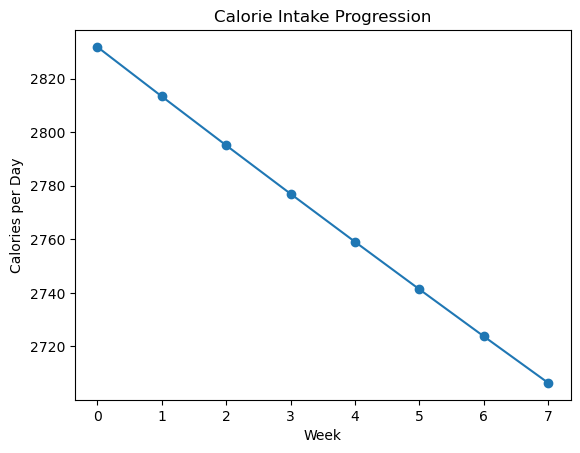

In [149]:
plt.plot(df.index, df.TargetCalories)
plt.scatter(x=df.index, y=df.TargetCalories)
plt.title('Calorie Intake Progression')
plt.xlabel('Week')
plt.ylabel('Calories per Day')
plt.show()

In [132]:
df.to_csv("diet.csv")